## Mini Project III

# mini-project-III
Repo with the instructions for the Mini Project III.


### Topics
This mini project is dedicated to following topics:
- Data Wrangling
- Data Visualization
- Data Preparation and Feature Engineering
- Dimensionality Reduction
- Unsupervised Learning

### Data
We will be using old data about different financial transactions. You can download the data from [here](https://drive.google.com/file/d/1zAjnf936aHkwVCq_BmA47p4lpRjyRzMf/view?usp=sharing). The data contains following tables:

- twm_customer - information about customers
- twm_accounts - information about accounts
- twm_checking_accounts - information about checking accounts (subset of twm_accounts)
- twm_credit_accounts - information about checking accounts (subset of twm_accounts)
- twm_savings_accounts - information about checking accounts (subset of twm_accounts)
- twm_transactions - information about financial transactions
- twm_savings_tran - information about savings transactions (subset of twm_transactions)
- twm_checking_tran - information about savings transactions (subset of twm_transactions)
- twm_credit_tran - information about credit checking (subset of twm_transactions)


### Output

In this miniproject, we will:

1.  create two separate customer segmentations (using clustering) to split them into 3-5 clusters: (Create two dataframes, then cluster those dataframes)
    - based on demographics (only on the information from twm_customer)
    - based on their banking behavior. We can take following things into consideration as banking behavior:
        - do they have savings account? How much do they save?
        - do they have credit account? How much do they live in debt?
        - are they making lot of small transactions or few huge ones?
2. visualize the created clusters using [radar charts](https://plotly.com/python/radar-chart/) and compare them agains each other
3. visualize segmentations using scatter plot. We will have to use PCA to be able to plot our observations in 2D.
4. (stretch) visualize in 2D how our clusters are evolving in each iteration of KMeans (for at least 20 iterations).
    - we will need to create own implementation of kmeans so we can see what is happening with the clusters during the iterations.


In [168]:
# Importing Libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from functools import reduce
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
plt.rcParams["figure.figsize"] = (12,8)

# Importing csv's

In [169]:
twm_accounts = pd.read_csv('twm_accounts.csv',sep=';')
twm_checking_acct = pd.read_csv('twm_checking_acct.csv',sep=';')
twm_checking_tran = pd.read_csv('twm_checking_tran.csv',sep=';')
twm_credit_acct = pd.read_csv('twm_credit_acct.csv',sep=';')
twm_credit_tran = pd.read_csv('twm_credit_tran.csv',sep=';')
twm_customer = pd.read_csv('twm_customer.csv',sep=';')
twm_savings_acct = pd.read_csv('twm_savings_acct.csv',sep=';')
twm_savings_tran = pd.read_csv('twm_savings_tran.csv',sep=';')
twm_transactions = pd.read_csv('twm_transactions.csv',sep=';')

# Clustering Demographic Dataframe (twm_customer)

In [170]:
twm_customer = twm_customer.drop(['name_prefix', 'first_name', 'last_name', 'street_nbr', 'street_name', 
                                  'postal_code', 'cust_id', 'city_name', 'state_code'],axis=1)
twm_customer.head(3)

,income,age,years_with_bank,nbr_children,gender,marital_status
0,26150,46,5,1,M,2
1,6605,71,1,0,M,2
2,18548,38,8,0,F,1


In [171]:
# Transforming string Data
encoders = {}
for col in twm_customer.columns:
    if twm_customer[col].dtypes == object:
        enc = LabelEncoder()
        enc.fit(twm_customer[col])
        twm_customer[col] = enc.transform(twm_customer[col])
        encoders.update({col:enc})

In [172]:
twm_customer

,income,age,years_with_bank,nbr_children,gender,marital_status
0,26150,46,5,1,1,2
1,6605,71,1,0,1,2
2,18548,38,8,0,0,1
3,47668,54,3,0,0,1
4,44554,59,9,2,0,4
...,...,...,...,...,...,...
742,14795,36,6,1,0,4
743,26387,56,6,1,1,2
744,61300,50,0,2,1,2
745,15100,37,7,0,0,2


In [173]:
# normalize data using MinMaxScalar sklearn
scaler = MinMaxScaler()
twm_customer[['income', 'age', 'years_with_bank']] = scaler.fit_transform(twm_customer[['income', 'age', 'years_with_bank']])

In [174]:
twm_customer

,income,age,years_with_bank,nbr_children,gender,marital_status
0,0.181399,0.434211,0.555556,1,1,2
1,0.045818,0.763158,0.111111,0,1,2
2,0.128665,0.328947,0.888889,0,0,1
3,0.330667,0.539474,0.333333,0,0,1
4,0.309066,0.605263,1.000000,2,0,4
...,...,...,...,...,...,...
742,0.102631,0.302632,0.666667,1,0,4
743,0.183043,0.565789,0.666667,1,1,2
744,0.425231,0.486842,0.000000,2,1,2
745,0.104747,0.315789,0.777778,0,0,2


# Elbow Rule

In [175]:
def plot_distortion(X, max_clusters = 10):
    distortions = []
    for i in range(1, max_clusters+1):
        km = KMeans(n_clusters = i,
                   init='k-means++',
                   n_init=10,
                   random_state=0)
        km.fit(X)
        distortions.append(km.inertia_)
    plt.plot(range(1,max_clusters +1), distortions, marker = 'o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show()

C:\Users\Jesse Randolph\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


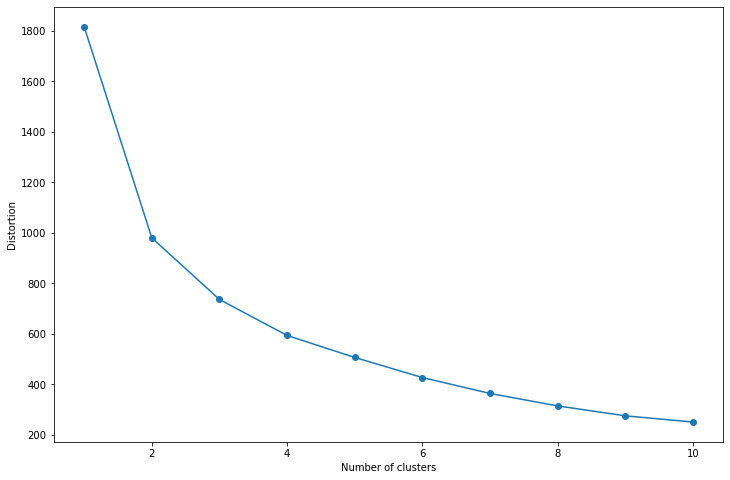

In [176]:
plot_distortion(twm_customer)

# Clustering Data into 3 clusters

In [177]:
# Clustering Data
kmeans = KMeans(n_clusters=3,init='k-means++', random_state=0)
y_m1 = kmeans.fit(twm_customer)

In [178]:
# Adding new column to see what cluster data belongs to
Label_1 = y_m1.predict(twm_customer)
lis = []
for i in Label_1:
    lis.append(i)
twm_customer["Cluster"] = lis

In [179]:
# Splitting dataframe into 3 seperate dataframes(clusters)
cus_cluster_0 = twm_customer[twm_customer.Cluster == 0]
cus_cluster_1 = twm_customer[twm_customer.Cluster == 1]
cus_cluster_2 = twm_customer[twm_customer.Cluster == 2]

In [180]:
# Clusters
cus_cluster_0.describe()

,income,age,years_with_bank,nbr_children,gender,marital_status,Cluster
count,276.000000,276.000000,276.000000,276.0,276.000000,276.0,276.0
mean,0.098276,0.222731,0.423510,0.0,0.423913,1.0,0.0
std,0.127763,0.227432,0.286172,0.0,0.495075,0.0,0.0
min,0.000000,0.000000,0.000000,0.0,0.000000,1.0,0.0
25%,0.000000,0.039474,0.222222,0.0,0.000000,1.0,0.0
50%,0.052873,0.078947,0.444444,0.0,0.000000,1.0,0.0
75%,0.150829,0.384868,0.666667,0.0,1.000000,1.0,0.0
max,0.770022,0.934211,1.000000,0.0,1.000000,1.0,0.0


In [181]:
cus_cluster_1.describe()

,income,age,years_with_bank,nbr_children,gender,marital_status,Cluster
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.0
mean,0.222694,0.348960,0.405190,2.514970,0.437126,2.520958,1.0
std,0.144279,0.117846,0.296260,0.849211,0.497523,0.797876,0.0
min,0.020290,0.131579,0.000000,2.000000,0.000000,2.000000,1.0
25%,0.116810,0.263158,0.111111,2.000000,0.000000,2.000000,1.0
50%,0.192942,0.328947,0.333333,2.000000,0.000000,2.000000,1.0
75%,0.303887,0.434211,0.666667,3.000000,1.000000,3.000000,1.0
max,0.896217,0.605263,1.000000,5.000000,1.000000,4.000000,1.0


In [182]:
cus_cluster_2.describe()

,income,age,years_with_bank,nbr_children,gender,marital_status,Cluster
count,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.0
mean,0.175856,0.559211,0.459795,0.375000,0.457237,2.332237,2.0
std,0.162272,0.214617,0.306538,0.484921,0.498989,0.688050,0.0
min,0.007207,0.105263,0.000000,0.000000,0.000000,2.000000,2.0
25%,0.063190,0.434211,0.222222,0.000000,0.000000,2.000000,2.0
50%,0.132907,0.565789,0.444444,0.000000,0.000000,2.000000,2.0
75%,0.229165,0.697368,0.666667,1.000000,1.000000,2.000000,2.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,2.0


In [184]:
Label_1

array([2, 2, 0, 0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 2,
       2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 1, 0, 2, 0, 0, 2, 1, 2, 1,
       0, 2, 2, 2, 1, 2, 0, 0, 1, 2, 0, 0, 2, 0, 0, 2, 1, 0, 0, 0, 2, 0,
       0, 1, 0, 0, 0, 1, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 1, 2, 2,
       0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 0,
       0, 2, 2, 0, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 0, 0, 0, 2, 1, 0, 2, 2,
       0, 2, 2, 0, 0, 1, 0, 0, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 0, 1, 1, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       1, 1, 2, 2, 0, 0, 0, 0, 1, 2, 2, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 0, 1, 0, 1, 2, 1,
       0, 1, 1, 1, 0, 1, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 1, 1, 0, 2, 1, 0,
       0, 0, 0, 2, 1, 0, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1,
       0, 0, 2, 0, 1, 1, 1, 0, 0, 0, 2, 1, 0, 2, 2, 2, 0, 2, 2, 1, 1, 0,
       2, 1, 1, 0, 0, 1, 1, 0, 2, 0, 0, 1, 0, 0, 0,

# Plotting Segmentation 1 (Demographic)

In [190]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(twm_customer)
pca_2d = pca.transform(twm_customer)
pca_2d

array([[ 0.68033494, -0.49036212],
       [ 0.01429499, -1.20530287],
       [-1.4590276 ,  0.457243  ],
       ...,
       [ 0.94745865,  0.85341766],
       [-0.0154525 , -1.14833656],
       [-1.47286119,  0.50749879]])

In [194]:
def plot_clusters(X,y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=50,
                    marker='*',
                    label=f'cluster {cluster}')
    plt.legend()
    plt.grid()
    plt.show()

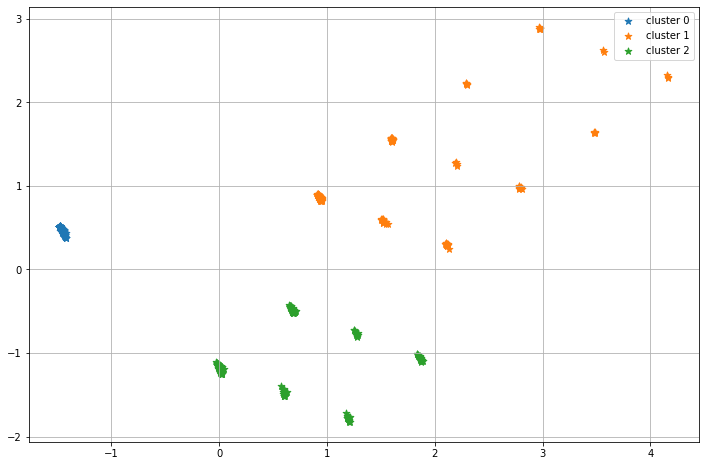

In [195]:
plot_clusters(pca_2d, Label_1, plt_cluster_centers= True)